In [1]:
# Import necessary libraries
import gzip  # For reading compressed files
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For heatmap visualization
import pandas as pd  # For data manipulation
from collections import defaultdict  # For efficient counting with default values


In [2]:
# Initialize a dictionary to store counts of each (X, Y) pair
# X = difference between fragment and binding site centers
# Y = fragment size (end - start)
counts = defaultdict(int)

# Path to the compressed BED-like file
filename = "mapped.bed.gz"

# Open the file in text mode ('rt' for reading text inside gzip)
with gzip.open(filename, 'rt') as f:
    for line in f:
        cols = line.strip().split('\t')  # Split each line by tabs

        # Skip lines with fewer than 11 columns
        if len(cols) < 11:
            continue

        try:
            # Extract the start and end positions of the fragment
            pos3, pos4 = int(cols[2]), int(cols[3])  # Fragment
            pos9, pos10 = int(cols[8]), int(cols[9])  # Binding site
        except ValueError:
            # Skip the line if any of these values cannot be converted to integers
            continue

        # Compute the center of the fragment and the binding site
        C1 = (pos3 + pos4) // 2  # Center of fragment
        C2 = (pos9 + pos10) // 2  # Center of binding site

        # Calculate X as the offset between centers
        X = C2 - C1

        # Calculate Y as the fragment size
        Y = pos10 - pos9

        # Count the occurrence of this (X, Y) pair
        counts[(X, Y)] += 1
        


In [3]:
# Convert the dictionary into a pandas DataFrame for further processing
# Each row will have X (center diff), Y (fragment size), Z (count of (X, Y))
data = pd.DataFrame([(x, y, z) for (x, y), z in counts.items()], columns=['X', 'Y', 'Z'])

# Pivot the DataFrame into a matrix format suitable for a heatmap
# Rows are Y, columns are X, and values are Z
heatmap_data = data.pivot(index='Y', columns='X', values='Z').fillna(0)  # Fill NaNs with 0s


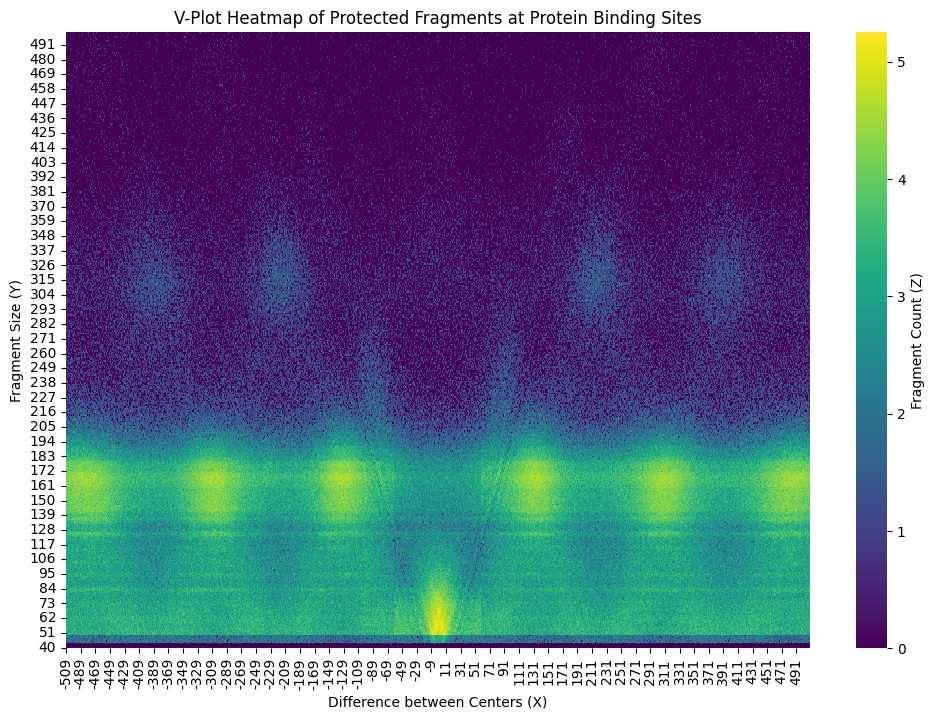

In [10]:
# Plot the V-plot heatmap
plt.figure(figsize=(12, 8))  # Set the overall size of the plot

# Generate the heatmap using the pivoted DataFrame
sns.heatmap(
    heatmap_data,                # The matrix of Z values with rows=Y (fragment size), columns=X (center difference)
    cmap='viridis',              # Choose a perceptually uniform color map
    cbar_kws={'label': 'Fragment Count (Z)'}  # Label the color bar to indicate fragment counts
)

# Add an informative title and axis labels
plt.title('V-Plot Heatmap of Protected Fragments at Protein Binding Sites')  # Title shows what the plot represents
plt.xlabel('Difference between Centers (X)')  # X = C2 - C1; how far fragments are from binding site centers
plt.ylabel('Fragment Size (Y)')               # Y = Column10 - Column9; size of protected DNA fragment
plt.gca().invert_yaxis() # Invert Y-axis to have a more clear 'V' shape in the plot


# Save the heatmap as a high-resolution PNG image
plt.savefig('v_plot_heatmap.png', dpi=300, bbox_inches='tight')  # Ensures high-quality saved figure

# Show the plot in the notebook
plt.show()
